<a href="https://colab.research.google.com/github/3bdlslam/cache-simulation-for-multi-processors-system/blob/master/shared_memory_cache_based_multi_processor_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

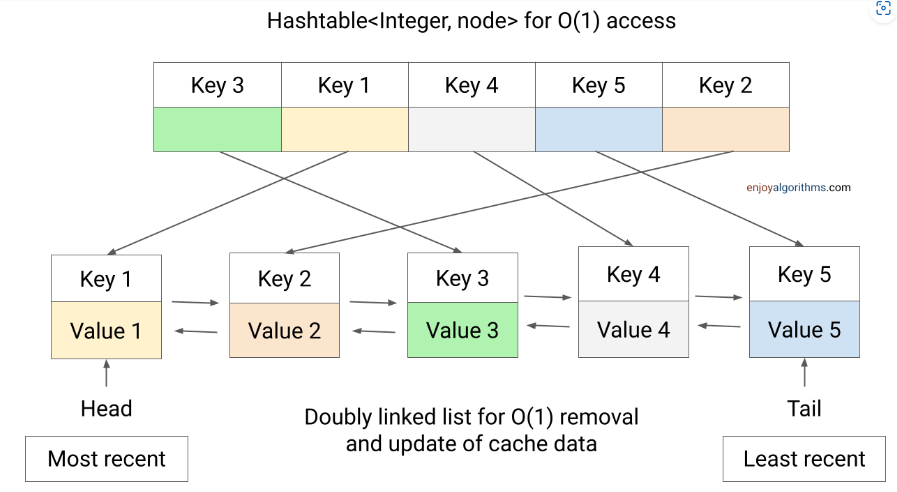

In [ ]:
RAM = [i**2 for i in range(0,1000)]
   

In [33]:
# Cache Memory with Least Recently used Replacement 
# write through - Write InValidate 
class Node :
  def __init__ (self, k, v):
    self.key   = k
    self.value = v
    self.status= "VALID"
    self.prev = None 
    self.next = None

class WTWILRUCache :
  # static variable
  RAM = [i**2 for i in range(0,1000)]
  cache_list = []

  def __init__(self, capacity):
    # initialize LRU cache with capacity
    self.capacity = capacity
    self.hashMap = dict()
    self.cache_id = len(type(self).cache_list)
    type(self).cache_list.append(self)
    # head and tail for doubly linked list
    self.head = None 
    self.tail = None 


  def write(self, key, value):
    # write cache  ( Least recently used)
    self.put(key, value)
    # write memory (write through)
    self._ram_write(key, value)
    # invalidate   (write invalidate)
    self._invalidate(key) 


  def read(self, key):
        # return teh value of the key if the key exists, otherwise return -1
        if key in self.hashMap:
            # read Hit
            node = self.hashMap[key]
            self._remove(node)
            self._add(node)

            if(node.status == "INV  "):  
            # miss dueto in coherent data 
              node.value = self._ram_read(node.key)
              node.status = "VALID"
            return node.value
        else:
            # read Miss
            value = self._ram_read(key)
            self.put(key, value )
        return value

  def put(self, key, value):
        # ubdate value of the key if it exists 
        # this key becoes the most recently used one 
        if key in self.hashMap:
            #if already prersent,  cache hit
            self._remove(self.hashMap[key])

        node = Node(key, value)
        #add new node to start of list
        self._add(node)
        self.hashMap[key] = node
 
        # if the number of keys exceeds the capacity, remove the least recently used key
        if len(self.hashMap) > self.capacity:
            # remove least recently used node
            node = self.tail
            self._remove(node)
            del self.hashMap[node.key]

  def _invalidate(self,key):
    for ca in type(self).cache_list:
      if ca.cache_id != self.cache_id :
        if key in ca.hashMap:
          ca.hashMap[key].status = "INV  "

  def _ram_read(self, loc):
    return type(self).RAM[loc]

  def _ram_write(self, key, value):
    type(self).RAM[key] = value

  def _remove(self, node):
        # remove node from doubly linked list
        if (node.prev == None)  and (node.next == None): # head and tail 
          self.head = None
          self.tail = None
        elif node.next == None:                          # tail
          self.tail = node.prev
          node.prev.next = node.next

        elif node.prev == None:                          # head
          self.head = node.next
          node.next.prev = node.prev
        else: 
          node.prev.next = node.next
          node.next.prev = node.prev

  def _add(self, node):
        # add node to start of doubly linked list
        node.next           = self.head
        node.prev           = None
        if (self.head == None): #empty
          self.tail = node
          self.head = node
        else:
          self.head.prev      = node
          self.head           = node 




  def print(self):
        node = self.head
        print("======= status of the cache ",self.cache_id , " ============")
        print(self.hashMap.keys())
        if  node: 
          print("cache head=> ", self.head.key," : ", self.head.value)
          print("cache tail=> ", self.tail.key," : ", self.tail.value)
          print("list of nodes\n key  | Value  | Status | memory \n----------------- ")
          while node:
              print(node.key,"   | ", node.value,"  | ", node.status ,"  |  ", self._ram_read(node.key))
              node = node.next
        else:
          print("empty cache") 

  def print_class(self):
        node = self.head
        print("===========================================================")
        if  node: 
          title1=""
          title=""
          for ca in type(self).cache_list:
            title1 = title1 + "        cache "+str(ca.cache_id)+"         "
            title = title   + " key  | Value  | Status | "
          title=title+"Memory"
          print(title1)
          print(title)
          while node:
              line=""
              for ca in type(self).cache_list:
                line = line + " "+str(node.key)+"   | "+ str(node.value)+"    | "+ node.status+"  | "
              print( line ,"  ", self._ram_read(node.key))
              node = node.next

        else:
          print("empty cache") 



In [34]:
cache = [WTWILRUCache(5) for i in range(2)]
loc=10

cache[0].read( loc)
cache[1].read( loc)
cache[0].print_class()

cache[1].write( loc, 5)
cache[0].print_class()

cache[1].read( loc)
cache[0].print_class()

cache[1].write( loc, 15)
cache[0].print_class()

cache[0].write( loc, 20)
cache[0].print_class()

cache[1].read( loc)
cache[0].print_class()


        cache 0                 cache 1         
 key  | Value  | Status |  key  | Value  | Status | Memory
 10   | 100    | VALID  |  10   | 100    | VALID  |     100
        cache 0                 cache 1         
 key  | Value  | Status |  key  | Value  | Status | Memory
 10   | 100    | INV    |  10   | 100    | INV    |     5
        cache 0                 cache 1         
 key  | Value  | Status |  key  | Value  | Status | Memory
 10   | 100    | INV    |  10   | 100    | INV    |     5
        cache 0                 cache 1         
 key  | Value  | Status |  key  | Value  | Status | Memory
 10   | 100    | INV    |  10   | 100    | INV    |     15
        cache 0                 cache 1         
 key  | Value  | Status |  key  | Value  | Status | Memory
 10   | 20    | VALID  |  10   | 20    | VALID  |     20
        cache 0                 cache 1         
 key  | Value  | Status |  key  | Value  | Status | Memory
 10   | 20    | VALID  |  10   | 20    | VALID  |     20


In [31]:
#Cache Memory with Least Recently used Replacement 
class Node :
  def __init__ (self, k, v):
    self.key   = k
    self.value = v
    self.prev = None 
    self.next = None

class LRUCache :
  def __init__(self, capacity):
    # initialize LRU cache with capacity
    self.capacity = capacity
    self.hashMap = dict()

    # head and tail for doubly linked list
    self.head = None 
    self.tail = None 


  def get(self, key):
        # return teh value of the key if the key exists, otherwise return -1
        if key in self.hashMap:
            node = self.hashMap[key]
            #remove node from doubly linked list
            self._remove(node)
            # move node to start of list
            self._add(node)
            return node.value
        return -1

  def put(self, key, value):
        # ubdate value of the key if it exists 
        # this key becoes the most recently used one 
        if key in self.hashMap:
            #if already prersent,  cache hit
            self._remove(self.hashMap[key])

        node = Node(key, value)
        #add new node to start of list
        self._add(node)
        self.hashMap[key] = node
 
        # if the number of keys exceeds the capacity, remove the least recently used key
        if len(self.hashMap) > self.capacity:
            # remove least recently used node
            node = self.tail
            self._remove(node)
            del self.hashMap[node.key]

  def _remove(self, node):
        # remove node from doubly linked list
        if (node.prev == None)  and (node.next == None): # head and tail 
          self.head = None
          self.tail = None
        elif node.next == None:                          # tail
          self.tail = node.prev
          node.prev.next = node.next

        elif node.prev == None:                          # head
          self.head = node.next
          node.next.prev = node.prev
        else: 
          node.prev.next = node.next
          node.next.prev = node.prev

  def _add(self, node):
        # add node to start of doubly linked list
        node.next           = self.head
        node.prev           = None
        if (self.head == None): #empty
          self.tail = node
          self.head = node
        else:
          self.head.prev      = node
          self.head           = node 




  def print(self):
        node = self.head
        print("======= status of the cache ============")
        print(self.hashMap.keys())
        if  node: 
          print("cache head=> ", self.head.key," : ", self.head.value)
          print("cache tail=> ", self.tail.key," : ", self.tail.value)
          print("list of nodes\n key   | Value\n----------------- ")
          while node:
              print(node.key,"    | ", node.value)
              node = node.next
        else:
          print("empty cache") 





In [33]:
  cache = LRUCache(2)
cache.print()
cache.put('#1', 100)
cache.put('#2', 100)
cache.print()
cache.get('#1')
cache.print()
cache.put('#3', 300)
cache.print()
cache.get('#3')
cache.print()




======= status of the cache ============
dict_keys([])
empty cache
======= status of the cache ============
dict_keys(['#1', '#2'])
cache head=>  #2  :  100
cache tail=>  #1  :  100
list of nodes
 key   | Value
----------------- 
#2     |  100
#1     |  100
======= status of the cache ============
dict_keys(['#1', '#2'])
cache head=>  #1  :  100
cache tail=>  #2  :  100
list of nodes
 key   | Value
----------------- 
#1     |  100
#2     |  100
======= status of the cache ============
dict_keys(['#1', '#3'])
cache head=>  #3  :  300
cache tail=>  #1  :  100
list of nodes
 key   | Value
----------------- 
#3     |  300
#1     |  100
======= status of the cache ============
dict_keys(['#1', '#3'])
cache head=>  #3  :  300
cache tail=>  #1  :  100
list of nodes
 key   | Value
----------------- 
#3     |  300
#1     |  100
